In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [3]:
df_train = pd.read_csv('hw3_train.csv', encoding='utf8')

In [4]:
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
customer_id,107620.00,107775.00,112208.00,112270.00,112332.00,112456.00,112518.00,112580.00,112673.00,112146.00,...,333393.00,332959.00,332928.00,332060.0,332184.00,332246.00,332463.00,332525.00,332618.00,332711.00
customer_residence_code,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00
gender,2.00,2.00,0.00,0.00,0.00,0.00,2.00,0.00,2.00,0.00,...,0.00,2.00,2.00,0.0,0.00,2.00,2.00,0.00,2.00,0.00
age,47.00,52.00,24.00,26.00,26.00,24.00,23.00,26.00,23.00,23.00,...,6.00,23.00,23.00,22.0,44.00,22.00,23.00,28.00,24.00,22.00
is_new_customer,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
seniority_month,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,36.00,...,35.00,36.00,36.00,36.0,36.00,36.00,36.00,36.00,36.00,36.00
customer_type,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00
customer_relation_type,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,...,0.00,1.00,1.00,1.0,1.00,0.00,1.00,1.00,1.00,0.00
residence_same_as_bank,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,2.00,2.00,2.00,2.0,2.00,2.00,2.00,2.00,2.00,2.00
country_same_as_bank,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2.00,0.00


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 29 columns):
customer_id                7500 non-null int64
customer_residence_code    7500 non-null int64
gender                     7500 non-null int64
age                        7500 non-null int64
is_new_customer            7500 non-null float64
seniority_month            7500 non-null int64
customer_type              7500 non-null float64
customer_relation_type     7500 non-null int64
residence_same_as_bank     7500 non-null int64
country_same_as_bank       7500 non-null int64
join_channel               7500 non-null int64
adress_type                7500 non-null float64
activity_index             7500 non-null float64
household_income           7500 non-null float64
segment                    7500 non-null int64
use_savings                7500 non-null int64
use_guarantees             7500 non-null int64
use_current_accounts       7500 non-null int64
use_derivada_account       7500 non-n

In [6]:
df_train.shape

(7500, 29)

In [7]:
import seaborn as sns
plt.style.use('ggplot')                       # задаем единоразово стиль графиков 
plt.rcParams['figure.figsize'] = (18,12)
#sns.heatmap(df_train.corr('kendall'), annot=True, linewidths=.5);

In [8]:
#for col in df_train.columns: print(col, df_train[col].unique())

In [9]:
df_test = pd.read_csv('hw3_test_data.csv', encoding='utf8')

In [10]:
df_train.shape

(7500, 29)

In [11]:
df_train.groupby('is_new_customer')['is_new_customer'].count()

is_new_customer
-1.0      58
 0.0    7440
 1.0       2
Name: is_new_customer, dtype: int64

In [12]:
def preprocess_data(df_input):
    df_output = df_input.copy()
    
    df_output.drop('customer_id', axis=1, inplace=True)
    df_output.drop('use_savings', axis=1, inplace=True)
    df_output.drop('use_guarantees', axis=1, inplace=True)
    df_output.drop('use_derivada_account', axis=1, inplace=True)
    
    df_output.drop('is_new_customer', axis=1, inplace=True)
    df_output.drop('customer_type', axis=1, inplace=True)
    df_output.drop('adress_type', axis=1, inplace=True)
    df_output.drop('residence_same_as_bank', axis=1, inplace=True) # new 
    
    #df_output.drop('customer_residence_code', axis=1, inplace=True)
    #df_output.drop('country_same_as_bank', axis=1, inplace=True) # new 

    #df_output.drop('gender', axis=1, inplace=True) # new
    #df_output.drop('seniority_month', axis=1, inplace=True) # new 
    #df_output.drop('segment', axis=1, inplace=True) # new 
    #df_output.drop('join_channel', axis=1, inplace=True) # new 
    
    #df_output.drop('household_income', axis=1, inplace=True) # new 
    #df_output.drop('use_short_deposits', axis=1, inplace=True) # new 
    #df_output.drop('use_medium_deposits', axis=1, inplace=True) # new 
    #df_output.drop('use_long_deposits', axis=1, inplace=True) # new 
    #df_output.drop('use_e_account', axis=1, inplace=True) # new 
    #df_output.drop('use_loans', axis=1, inplace=True) # new 
    
    #df_output['gender'].replace(1, np.nan, inplace=True)
    df_output.fillna(0, inplace=True)

    
    return df_output

In [13]:
df_preproc = df_train.pipe(preprocess_data)
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
customer_residence_code    7500 non-null int64
gender                     7500 non-null int64
age                        7500 non-null int64
seniority_month            7500 non-null int64
customer_relation_type     7500 non-null int64
country_same_as_bank       7500 non-null int64
join_channel               7500 non-null int64
activity_index             7500 non-null float64
household_income           7500 non-null float64
segment                    7500 non-null int64
use_current_accounts       7500 non-null int64
use_payroll_account        7500 non-null int64
use_short_deposits         7500 non-null int64
use_medium_deposits        7500 non-null int64
use_long_deposits          7500 non-null int64
use_e_account              7500 non-null int64
use_loans                  7500 non-null int64
use_taxes                  7500 non-null int64
use_credit_card            7500 non-null in

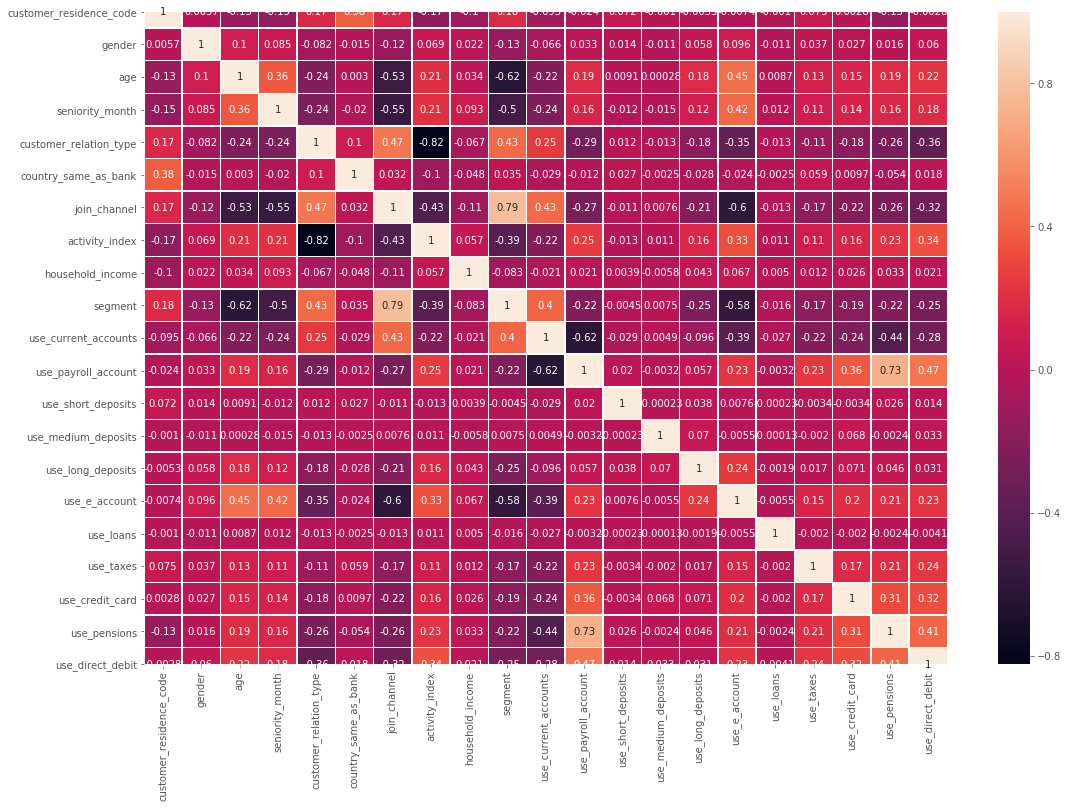

In [14]:
sns.heatmap(df_preproc.corr('kendall'), annot=True, linewidths=.5);

In [17]:
for col in df_preproc.columns: print(col, df_preproc[col].unique())

customer_residence_code [1 4 2 3 0]
gender [2 0 1]
age [47 52 24 26 23 28 25 29 34 59 44 40 27 56 33 42 41 38 51 30 37 31 36 45
 43 46 86 53 62 39 -1 57 35 48 55 73 32  5 67 78 63 22 14 11 16 54 68 50
 72 70 64 20 61 75 60 49 58 85 83 74 66 89 80 10 65 88 76 91 69  6 15 92
 81 12 79  7 13 77 17  9 82 18 21 71 90 19 94  8 87 98]
seniority_month [36 -1  5 31  8  9 40 22 35 17 11 23 27 34 14 19 38  7 37 20 21 12 13 10
 39 18 26 32 28  6 33 30 24 16 15  0]
customer_relation_type [0 1 2]
country_same_as_bank [0 2 1]
join_channel [ 6 10  5  2  1 13  8 11  9  0 14  3 12  4]
activity_index [ 1.  0. -1.]
household_income [ 47164.86  68262.93  47451.24 ... 116417.85 180583.11  49240.68]
segment [1 0 2 3]
use_current_accounts [0 1]
use_payroll_account [1 0]
use_short_deposits [0 1]
use_medium_deposits [0 1]
use_long_deposits [0 1]
use_e_account [0 1]
use_loans [0 1]
use_taxes [0 1]
use_credit_card [0 1]
use_pensions [ 1.  0. -1.]
use_direct_debit [0 1]


In [18]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 21 columns):
customer_residence_code    7500 non-null int64
gender                     7500 non-null int64
age                        7500 non-null int64
seniority_month            7500 non-null int64
customer_relation_type     7500 non-null int64
country_same_as_bank       7500 non-null int64
join_channel               7500 non-null int64
activity_index             7500 non-null float64
household_income           7500 non-null float64
segment                    7500 non-null int64
use_current_accounts       7500 non-null int64
use_payroll_account        7500 non-null int64
use_short_deposits         7500 non-null int64
use_medium_deposits        7500 non-null int64
use_long_deposits          7500 non-null int64
use_e_account              7500 non-null int64
use_loans                  7500 non-null int64
use_taxes                  7500 non-null int64
use_credit_card            7500 non-null in

In [19]:
X = df_preproc.drop('use_direct_debit', axis=1)
y = df_preproc['use_direct_debit']

In [20]:
#for col in df_preproc.columns: print(col, df_preproc[col].isna().any())

In [21]:
# Поделите данные X и y на 2 части (train и test, размером от исходного 70% и 30% соответственно)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

In [54]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

tree = DecisionTreeClassifier(random_state=0, 
                              max_depth=6, 
                              min_samples_leaf=7,
                              min_samples_split=200,
                              max_leaf_nodes=18,
                              class_weight={1: 0.0003, 0:0.00018})


cv = KFold(10, shuffle=True, random_state=None)
result = cv.split(X)

my_list = []
for train_index, test_index in result:
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    tree.fit(X_train, y_train) # обучаем модель (дерево принятия решений)
    pred = tree.predict(X_test) # вмыдаем ответ
    print(f1_score(y_test, pred))
    my_list.append(f1_score(y_test, pred))
print('--')
print(sum(my_list)/len(my_list))

0.49315068493150693
0.4461538461538461
0.4878048780487805
0.45098039215686275
0.5662650602409639
0.6277372262773723
0.48818897637795267
0.5285714285714286
0.5985401459854015
0.5263157894736842
--
0.5213708428217799


In [23]:
tree

DecisionTreeClassifier(class_weight={0: 0.00018, 1: 0.0003}, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=18,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, X, y, cv=cv, scoring='f1')
scores 
print(sum(scores)/len(scores))

0.5385696536644644


In [25]:
def demo_feature_importance():
    scores = tree.feature_importances_ 
    for score, name in zip(scores, X.columns):
        print(" {:.4f} : {}".format(score, name))
        
demo_feature_importance()

 0.0000 : customer_residence_code
 0.0000 : gender
 0.0938 : age
 0.0034 : seniority_month
 0.1958 : customer_relation_type
 0.0000 : country_same_as_bank
 0.0045 : join_channel
 0.0016 : activity_index
 0.0091 : household_income
 0.0000 : segment
 0.0308 : use_current_accounts
 0.6144 : use_payroll_account
 0.0000 : use_short_deposits
 0.0000 : use_medium_deposits
 0.0000 : use_long_deposits
 0.0000 : use_e_account
 0.0000 : use_loans
 0.0245 : use_taxes
 0.0030 : use_credit_card
 0.0192 : use_pensions


In [27]:
df_preproc2 = df_test.pipe(preprocess_data)

In [28]:
pred = tree.predict(df_preproc2)

In [29]:
pd.DataFrame(zip(
    df_test['customer_id'],
    pred), columns=['customer_id', 'use_direct_debit']).to_csv('pred.csv', sep=',', index=False)

In [30]:
df_preproc2.shape

(7500, 20)

In [31]:
df_test.shape

(7500, 28)

In [32]:
np.unique(pred, return_counts=True)

(array([0, 1]), array([7004,  496]))

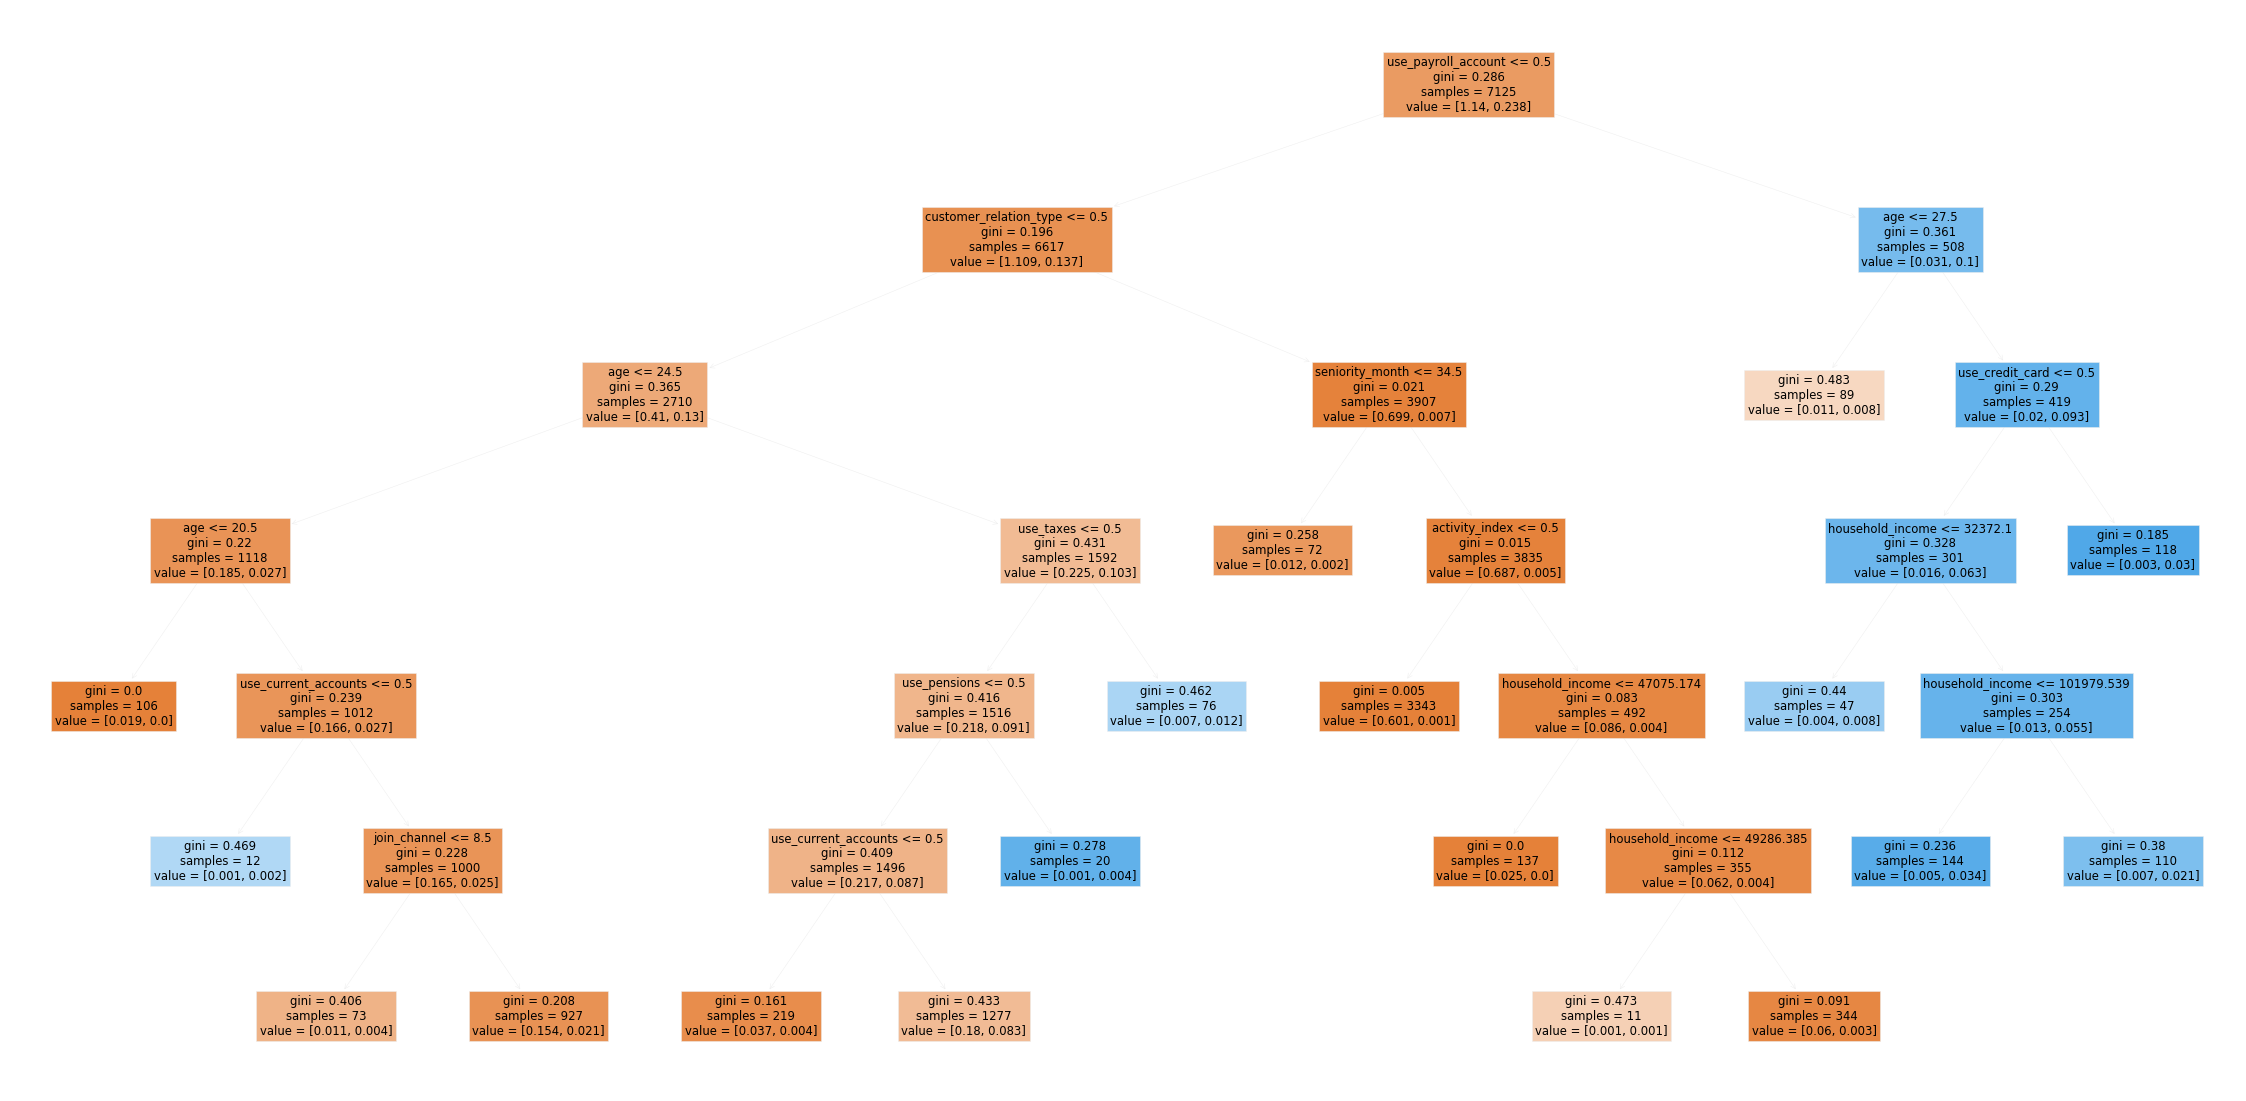

In [33]:
fig, ax = plt.subplots(figsize=(40,20))
     
# draw tree
plot_tree(tree, feature_names=df_preproc.columns, filled=True, ax=ax)
  
plt.show()